In [3]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#!pip install dlib

In [1]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bunzip2 shape_predictor_68_face_landmarks.dat.bz2

--2023-04-22 10:43:52--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  15.2MB/s    in 6.5s    

2023-04-22 10:43:59 (9.38 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



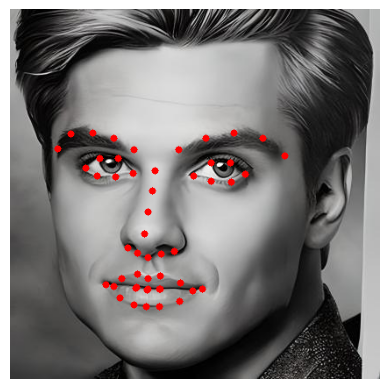

In [22]:
# Load the pre-trained model
predictor = dlib.shape_predictor('/content/shape_predictor_68_face_landmarks.dat')

# Load an image
image = cv2.imread('/content/Man_1.jpg')
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# Detect faces in the image
detector = dlib.get_frontal_face_detector()
faces = detector(gray, 1)

# Loop over the faces
for face in faces:
    # Get the facial landmarks
    shape = predictor(gray, face)
    shape = np.array([(shape.part(i).x, shape.part(i).y) for i in range(68)])

    # Extract the facial features
    features = {}
    features['left_eyebrow'] = shape[17:22]
    features['right_eyebrow'] = shape[22:27]
    features['nose'] = shape[27:36]
    features['left_eye'] = shape[36:42]
    features['right_eye'] = shape[42:48]
    features['mouth'] = shape[48:68]
    
    # Draw the facial features on the image
    for feature_name, feature_points in features.items():
        for point in feature_points:
            cv2.circle(image, (point[0], point[1]), 4, (0, 0, 255), -1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(image)


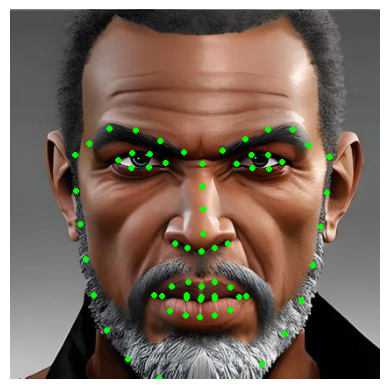

In [32]:
 # Load the pre-trained model
predictor = dlib.shape_predictor('/content/shape_predictor_68_face_landmarks.dat')
# Load an image
image = cv2.imread('/content/Man.jpg')
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# Detect faces in the image
detector = dlib.get_frontal_face_detector()
faces = detector(gray, 1)

# Loop over the faces
for face in faces:
    # Get the facial landmarks
    shape = predictor(gray, face)
    shape = np.array([(shape.part(i).x, shape.part(i).y) for i in range(68)])
 # Draw the facial features on the image
for feature_points in shape:
    cv2.circle(image, (feature_points[0], feature_points[1]), 2, (0, 255, 0), 2)
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

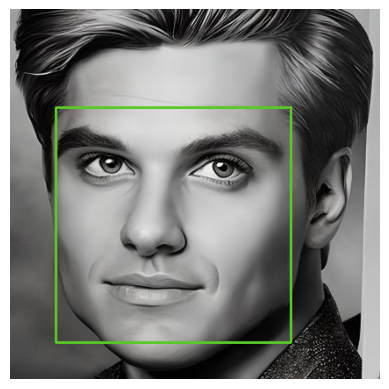

In [18]:
# Load the HOG-based object detector
detector = dlib.get_frontal_face_detector()
# Load an image
img = cv2.imread("/content/Man.jpg")
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Run the object detector on the image
faces = detector(gray, 1)
# Draw rectangles around the detected objects
for (i, rect) in enumerate(faces):
    x, y, w, h = rect.left(), rect.top(), rect.width(), rect.height()
    cv2.rectangle(img, (x, y), (x + w, y + h), (38, 200,90), 2)
# Display the image with the rectangles
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)